# Evaluate Performance
Verify that we get similar performance for 1 task per node and 4 tasks per node (1 per GPU)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

## Load in the test data
We saved the runtimes under different configurations

In [2]:
data = pd.read_json('runtimes.json', lines=True)
print(f'Loaded {len(data)} runs')

Loaded 7 runs


In [3]:
data.tail()

,pdb_file,sim_time,repeat,single_time,multi_time
2,2pwz_G.pdb,0.1,0,81.644669,84.953635
3,2pwz_G.pdb,0.1,1,78.981445,85.643832
4,2pwz_G.pdb,1.0,0,515.084400,528.706901
5,2pwz_G.pdb,1.0,1,510.662030,525.297399
6,2pwz_G.pdb,10.0,0,4891.028384,4976.971636


Compute the median for each test

In [4]:
columns = list(data.columns[:-3])
summary = data.groupby(columns)[['single_time', 'multi_time']].median().reset_index()

Compute the MD performance

In [5]:
for t in ['single', 'multi']:
    summary[f'{t}_rate'] = summary['sim_time'] / summary[f'{t}_time']

In [6]:
summary.head()

,pdb_file,sim_time,single_time,multi_time,single_rate,multi_rate
0,2pwz_G.pdb,0.01,51.563015,39.644182,0.000194,0.000252
1,2pwz_G.pdb,0.10,80.313057,85.298734,0.001245,0.001172
2,2pwz_G.pdb,1.00,512.873215,527.002150,0.001950,0.001898
3,2pwz_G.pdb,10.00,4891.028384,4976.971636,0.002045,0.002009


## Plot rate as a function simulation time
Fixing at two episodes, see the effect of batch size on the generation rate

In [7]:
subset = summary.query('pdb_file=="2pwz_G.pdb"')

Text(0, 0.5, 'MD Rate (ns/day)')

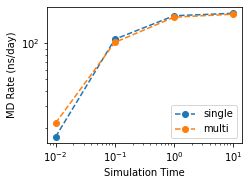

In [8]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

for t in ['single', 'multi']:
    ax.loglog(subset['sim_time'], subset[f'{t}_rate'] * 3600 * 24, '--o', label=t)

ax.legend()
ax.set_xlabel('Simulation Time')
ax.set_ylabel('MD Rate (ns/day)')

Text(0, 0.5, 'Runtime (min)')

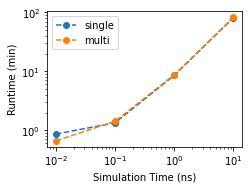

In [9]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

for t in ['single', 'multi']:
    ax.loglog(subset['sim_time'], subset[f'{t}_time'] / 60, '--o', label=t)

ax.legend()
ax.set_xlabel('Simulation Time (ns)')
ax.set_ylabel('Runtime (min)')

The performance differences between single and multi-node jobs become small for simulation times above 1ns.